In [1]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle=False)  # Ensure that it doesn't shuffle the data

Found 624 images belonging to 2 classes.


In [3]:
vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [4]:
model.load_weights('training_1/cp.ckpt')

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set), batch_size=8)

20/20 [==============================] - 13s 373ms/step - loss: 0.3711 - accuracy: 0.9231


In [7]:
predictions = model.predict(test_set, steps=len(test_set))

20/20 [==============================] - 6s 268ms/step


In [8]:
true_labels = test_set.classes

In [9]:
predicted_labels = np.argmax(predictions, axis=1)

In [10]:
report = classification_report(true_labels, predicted_labels, target_names=test_set.class_indices.keys())
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the test accuracy and other metrics
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print('\nClassification Report:\n', report)
print('\nConfusion Matrix:\n', confusion)

Test Loss: 0.3711
Test Accuracy: 0.9231

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.92      0.87      0.89       234
   PNEUMONIA       0.92      0.96      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624


Confusion Matrix:
 [[203  31]
 [ 17 373]]


In [11]:
true_labels = test_set.classes

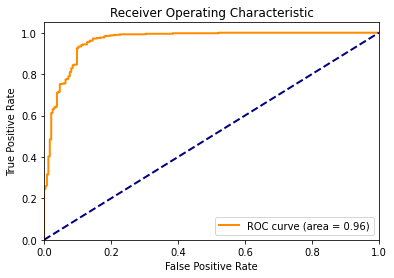

In [12]:
fpr, tpr, _ = roc_curve(true_labels, predictions[:, 1])  # Assuming pneumonia is the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

c:\Users\Biki\anaconda3\envs\venv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Biki\anaconda3\envs\venv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


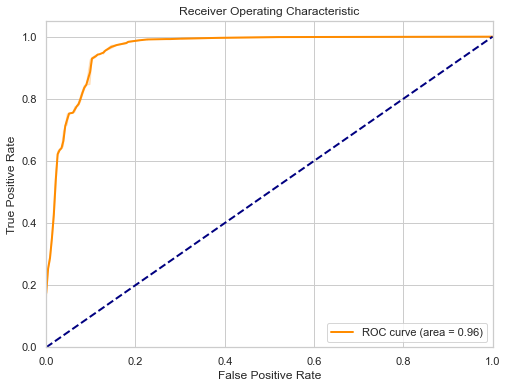

In [13]:
sns.set(style="whitegrid")

# Create ROC curve plot
plt.figure(figsize=(8, 6))
sns.lineplot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
sns.lineplot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show the plot
plt.show()
